In [265]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [266]:
def model():
  inp = tf.keras.layers.Input([512, 512, 3])

  layers = [tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 512*512*3]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu")
          tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=4, strides=2, padding="same", activation=None, use_bias=False)]
  prev = inp
  for layer in layers:
    prev = layer(prev)
  return tf.keras.Model(inputs=inp, outputs=prev)


          


In [267]:
import tensorflow as tf
def model():
  inp = tf.keras.layers.Input([28, 28, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 28*28*1]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            #tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(28,28), strides=(28,28), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)


          


In [268]:
model = model()

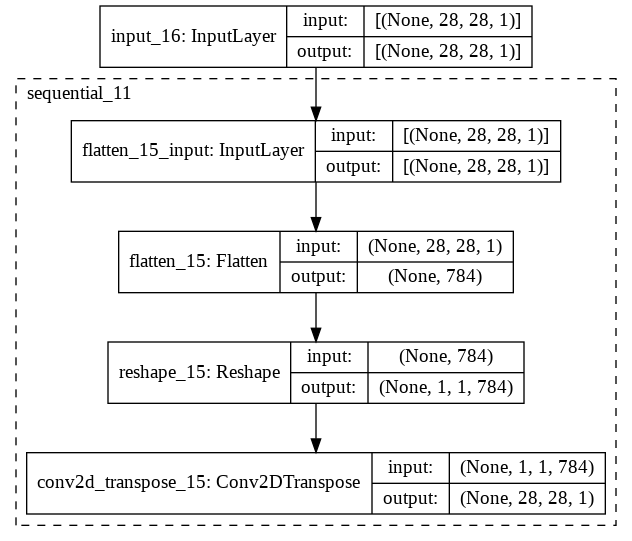

In [269]:
tf.keras.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [270]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 28, 28, 1)         614656    
Total params: 614,656
Trainable params: 614,656
Non-trainable params: 0
_________________________________________________________________


In [271]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [272]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [273]:
BATCH_SIZE = 32
BUFFER_SIZE = 100

In [274]:
def y_img(img):
  shifted_img = img[:, :14, ...]

  shifted_img = tf.image.resize_with_pad(shifted_img, 28, 70)[:,14:42,...]

  return img, shifted_img



In [275]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images[:BUFFER_SIZE]).map(y_img).batch(BATCH_SIZE, drop_remainder=True)

In [276]:
train_dataset

<BatchDataset shapes: ((32, 28, 28, 1), (32, 28, 28, 1)), types: (tf.float32, tf.float32)>

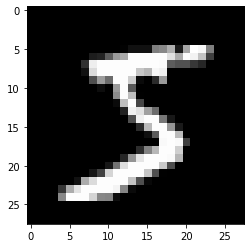

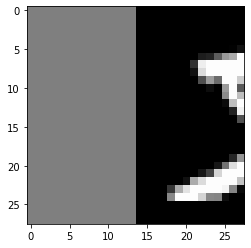

In [277]:
for train, target in train_dataset.take(1):
  plt.imshow(tf.image.grayscale_to_rgb(train[0] * 0.5 + 0.5))
  plt.show()
  plt.imshow(tf.image.grayscale_to_rgb(target[0] * 0.5 +0.5))
  plt.show()
  

In [278]:
optimizer = tf.keras.optimizers.Adam()
mae_loss = tf.keras.losses.MeanAbsoluteError()
def train_step(epochs):
  for i in range(epochs):
    for j, (train, target) in train_dataset.enumerate():
      with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        pred = model(train,training=True)
        loss = mae_loss(target, pred)
        gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f"epoch {i}")
    plt.subplot(1, 3, 1)
    plt.imshow(tf.image.grayscale_to_rgb(train[0]) * 0.5 + 0.5)
    plt.title('input')
    plt.subplot(1, 3, 2)
    plt.imshow(tf.image.grayscale_to_rgb(pred[0]) * 0.5 + 0.5)
    plt.title('pred')
    plt.subplot(1, 3, 3)
    plt.imshow(tf.image.grayscale_to_rgb(target[0]) * 0.5 + 0.5)
    plt.title('target')
    plt.show()
    print(loss)





epoch 0


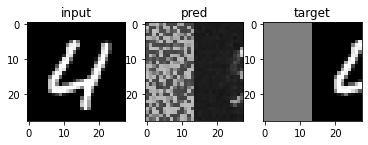

tf.Tensor(0.38211712, shape=(), dtype=float32)
epoch 1


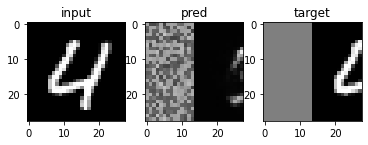

tf.Tensor(0.24649581, shape=(), dtype=float32)
epoch 2


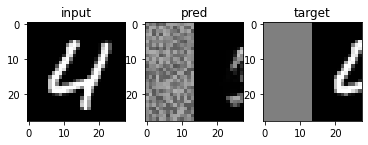

tf.Tensor(0.19395053, shape=(), dtype=float32)
epoch 3


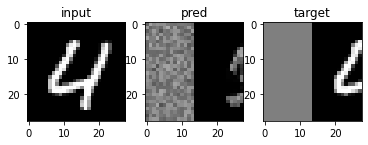

tf.Tensor(0.18847953, shape=(), dtype=float32)
epoch 4


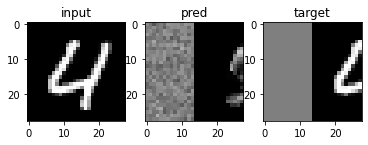

tf.Tensor(0.15005809, shape=(), dtype=float32)
epoch 5


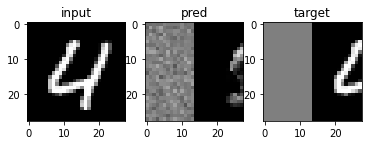

tf.Tensor(0.14893743, shape=(), dtype=float32)
epoch 6


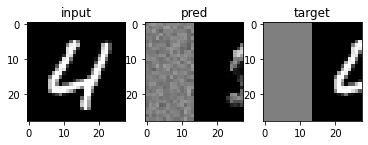

tf.Tensor(0.1361135, shape=(), dtype=float32)
epoch 7


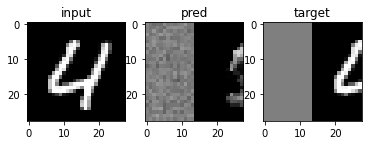

tf.Tensor(0.13297452, shape=(), dtype=float32)
epoch 8


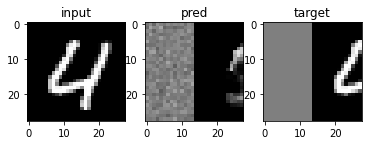

tf.Tensor(0.13190378, shape=(), dtype=float32)
epoch 9


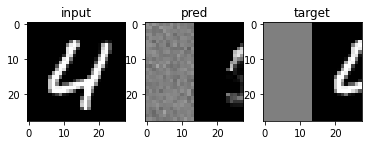

tf.Tensor(0.11762012, shape=(), dtype=float32)
epoch 10


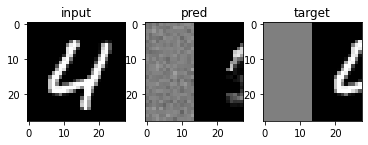

tf.Tensor(0.11728471, shape=(), dtype=float32)
epoch 11


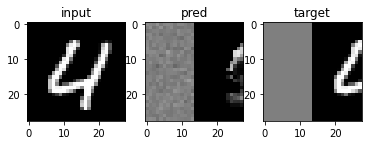

tf.Tensor(0.11052145, shape=(), dtype=float32)
epoch 12


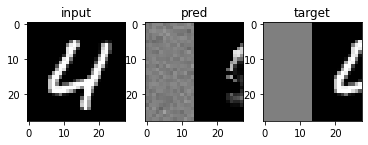

tf.Tensor(0.106415965, shape=(), dtype=float32)
epoch 13


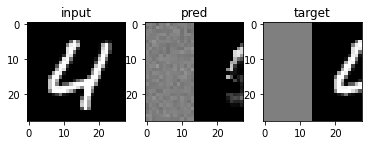

tf.Tensor(0.10265429, shape=(), dtype=float32)
epoch 14


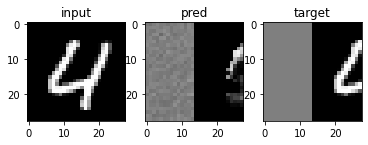

tf.Tensor(0.102045566, shape=(), dtype=float32)
epoch 15


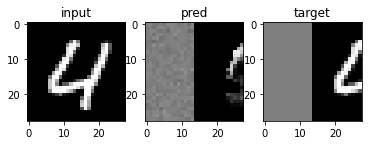

tf.Tensor(0.09831302, shape=(), dtype=float32)
epoch 16


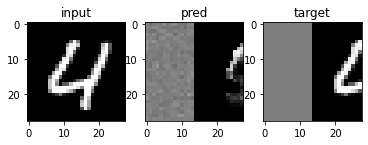

tf.Tensor(0.097426005, shape=(), dtype=float32)
epoch 17


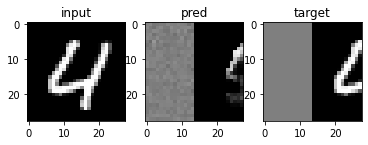

tf.Tensor(0.0959989, shape=(), dtype=float32)
epoch 18


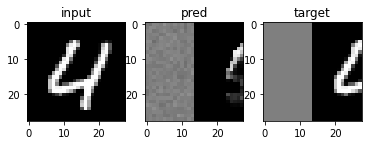

tf.Tensor(0.094430864, shape=(), dtype=float32)
epoch 19


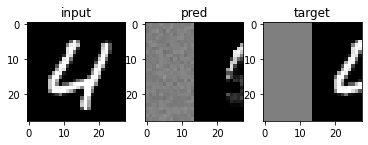

tf.Tensor(0.092244126, shape=(), dtype=float32)
epoch 20


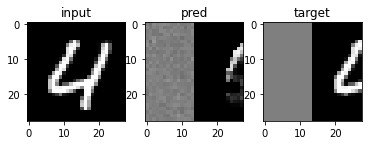

tf.Tensor(0.09207992, shape=(), dtype=float32)
epoch 21


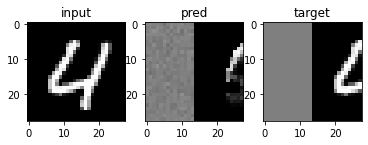

tf.Tensor(0.09109423, shape=(), dtype=float32)
epoch 22


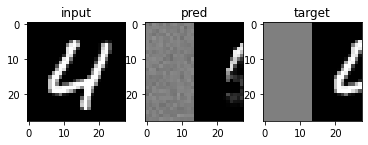

tf.Tensor(0.09051657, shape=(), dtype=float32)
epoch 23


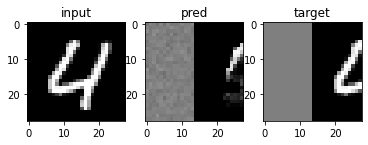

tf.Tensor(0.08898596, shape=(), dtype=float32)
epoch 24


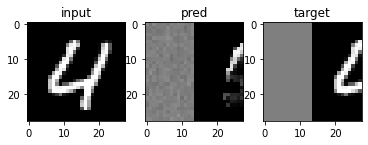

tf.Tensor(0.08780822, shape=(), dtype=float32)
epoch 25


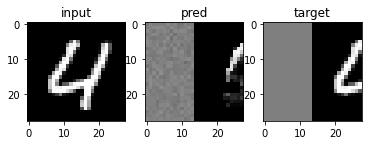

tf.Tensor(0.08749101, shape=(), dtype=float32)
epoch 26


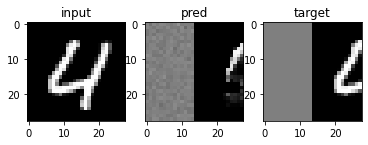

tf.Tensor(0.08683265, shape=(), dtype=float32)
epoch 27


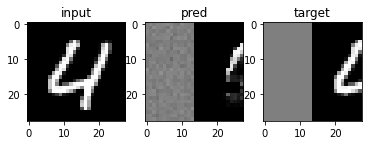

tf.Tensor(0.08499282, shape=(), dtype=float32)
epoch 28


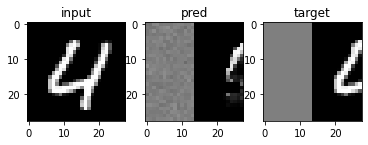

tf.Tensor(0.08453127, shape=(), dtype=float32)
epoch 29


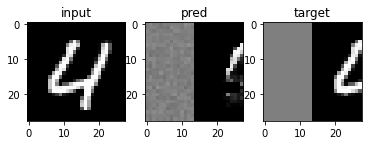

tf.Tensor(0.083953544, shape=(), dtype=float32)
epoch 30


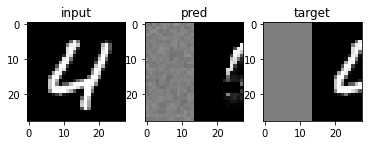

tf.Tensor(0.08311886, shape=(), dtype=float32)
epoch 31


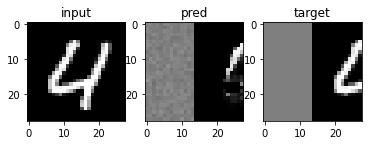

tf.Tensor(0.08259773, shape=(), dtype=float32)
epoch 32


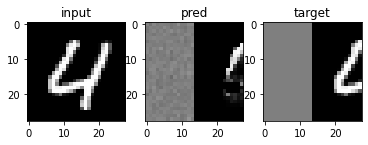

tf.Tensor(0.08182757, shape=(), dtype=float32)
epoch 33


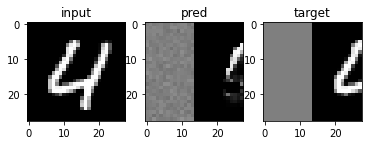

tf.Tensor(0.08189359, shape=(), dtype=float32)
epoch 34


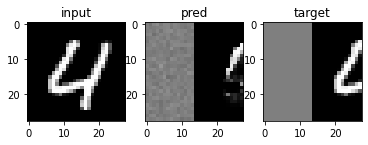

tf.Tensor(0.08094854, shape=(), dtype=float32)
epoch 35


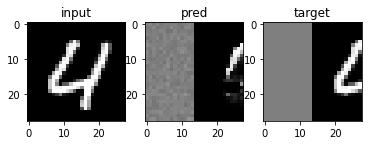

tf.Tensor(0.08114942, shape=(), dtype=float32)
epoch 36


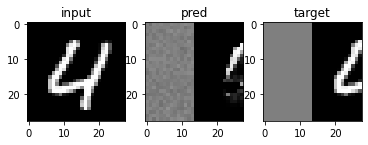

tf.Tensor(0.079683304, shape=(), dtype=float32)
epoch 37


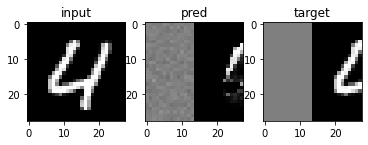

tf.Tensor(0.079634964, shape=(), dtype=float32)
epoch 38


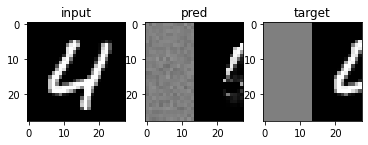

tf.Tensor(0.07950214, shape=(), dtype=float32)
epoch 39


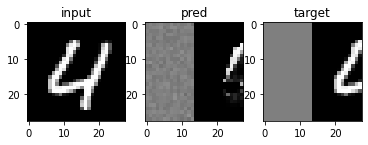

tf.Tensor(0.07920004, shape=(), dtype=float32)
epoch 40


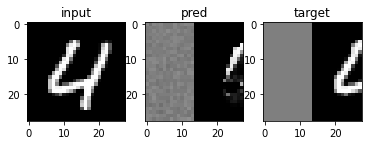

tf.Tensor(0.07789253, shape=(), dtype=float32)
epoch 41


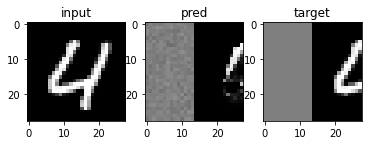

tf.Tensor(0.07774037, shape=(), dtype=float32)
epoch 42


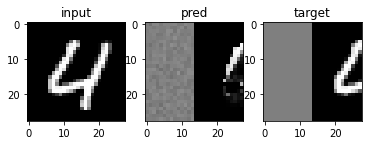

tf.Tensor(0.076649204, shape=(), dtype=float32)
epoch 43


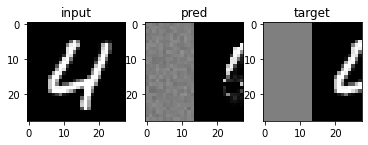

tf.Tensor(0.07671257, shape=(), dtype=float32)
epoch 44


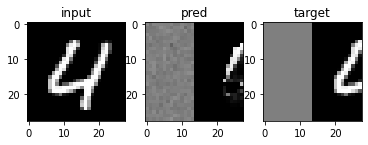

tf.Tensor(0.07547535, shape=(), dtype=float32)
epoch 45


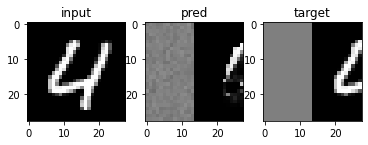

tf.Tensor(0.075215586, shape=(), dtype=float32)
epoch 46


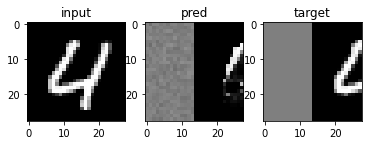

tf.Tensor(0.07506876, shape=(), dtype=float32)
epoch 47


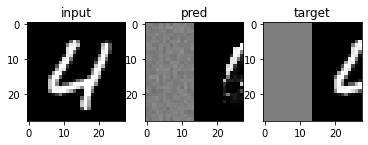

tf.Tensor(0.07467564, shape=(), dtype=float32)
epoch 48


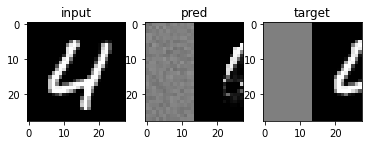

tf.Tensor(0.07417171, shape=(), dtype=float32)
epoch 49


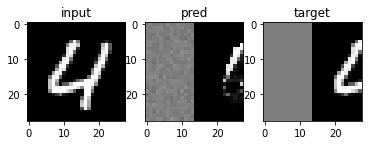

tf.Tensor(0.07326408, shape=(), dtype=float32)
epoch 50


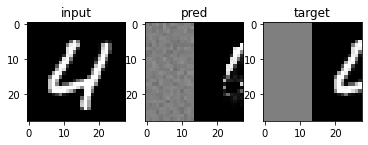

tf.Tensor(0.07265069, shape=(), dtype=float32)
epoch 51


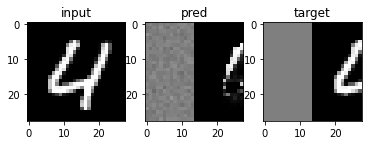

tf.Tensor(0.07341219, shape=(), dtype=float32)
epoch 52


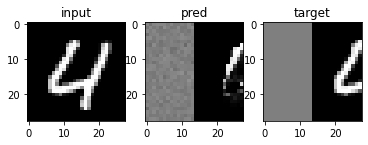

tf.Tensor(0.07206935, shape=(), dtype=float32)
epoch 53


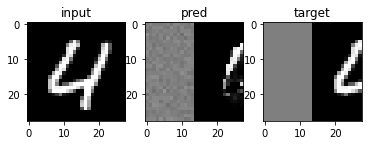

tf.Tensor(0.07167204, shape=(), dtype=float32)
epoch 54


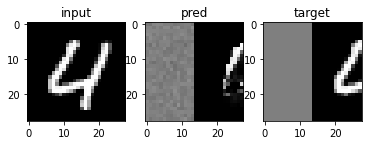

tf.Tensor(0.07152377, shape=(), dtype=float32)
epoch 55


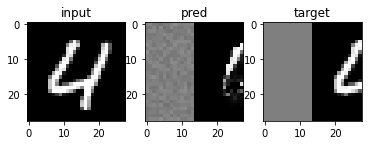

tf.Tensor(0.07056824, shape=(), dtype=float32)
epoch 56


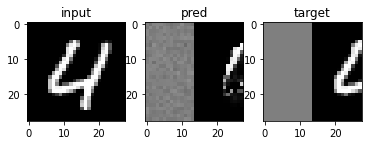

tf.Tensor(0.06943109, shape=(), dtype=float32)
epoch 57


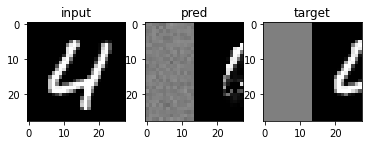

tf.Tensor(0.07022351, shape=(), dtype=float32)
epoch 58


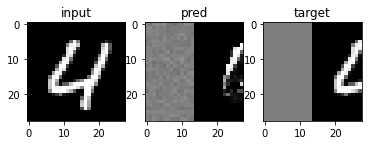

tf.Tensor(0.06874743, shape=(), dtype=float32)
epoch 59


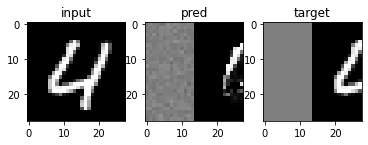

tf.Tensor(0.06904787, shape=(), dtype=float32)
epoch 60


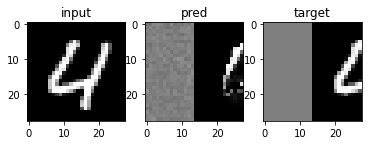

tf.Tensor(0.0686746, shape=(), dtype=float32)
epoch 61


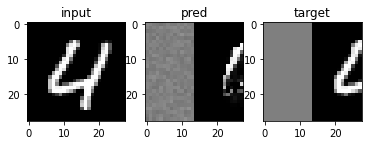

tf.Tensor(0.06765724, shape=(), dtype=float32)
epoch 62


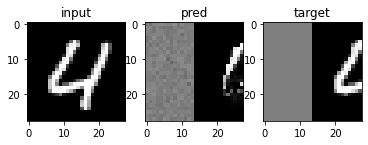

tf.Tensor(0.067967914, shape=(), dtype=float32)
epoch 63


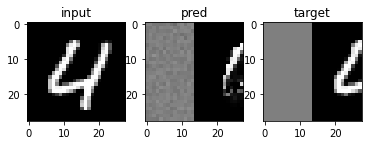

tf.Tensor(0.06674144, shape=(), dtype=float32)
epoch 64


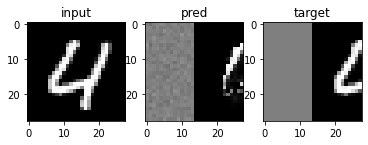

tf.Tensor(0.0668087, shape=(), dtype=float32)
epoch 65


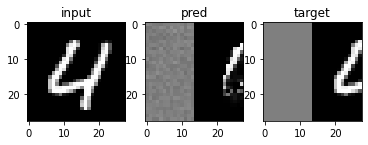

tf.Tensor(0.06643729, shape=(), dtype=float32)
epoch 66


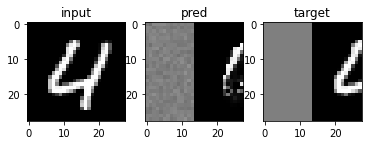

tf.Tensor(0.06589562, shape=(), dtype=float32)
epoch 67


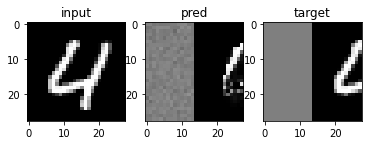

tf.Tensor(0.06651495, shape=(), dtype=float32)
epoch 68


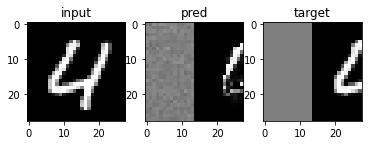

tf.Tensor(0.06622973, shape=(), dtype=float32)
epoch 69


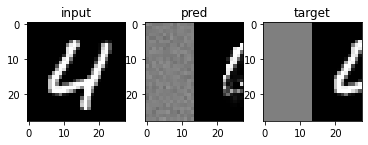

tf.Tensor(0.06449051, shape=(), dtype=float32)
epoch 70


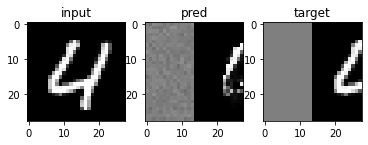

tf.Tensor(0.0641585, shape=(), dtype=float32)
epoch 71


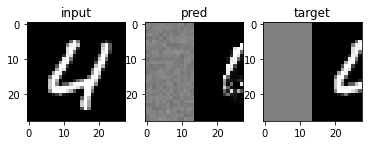

tf.Tensor(0.06392804, shape=(), dtype=float32)
epoch 72


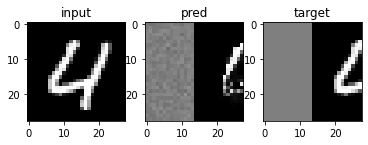

tf.Tensor(0.06443726, shape=(), dtype=float32)
epoch 73


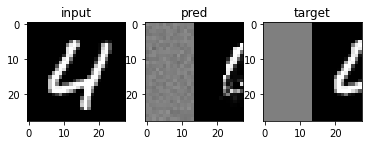

tf.Tensor(0.06301746, shape=(), dtype=float32)
epoch 74


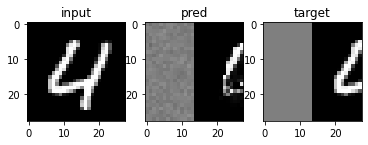

tf.Tensor(0.061534297, shape=(), dtype=float32)
epoch 75


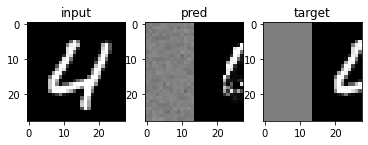

tf.Tensor(0.061127126, shape=(), dtype=float32)
epoch 76


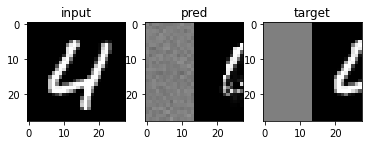

tf.Tensor(0.061017025, shape=(), dtype=float32)
epoch 77


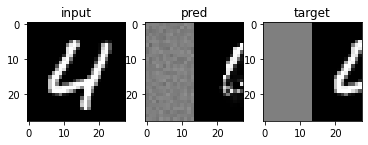

tf.Tensor(0.06119215, shape=(), dtype=float32)
epoch 78


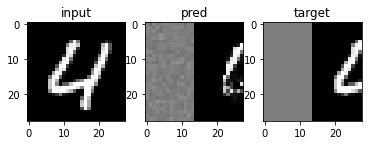

tf.Tensor(0.059902385, shape=(), dtype=float32)
epoch 79


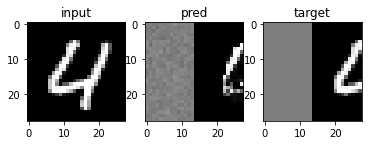

tf.Tensor(0.059709802, shape=(), dtype=float32)
epoch 80


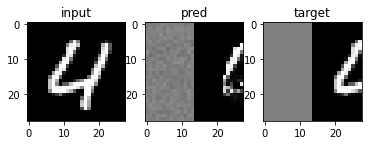

tf.Tensor(0.05966832, shape=(), dtype=float32)
epoch 81


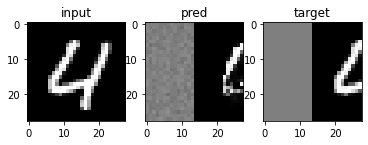

tf.Tensor(0.060374673, shape=(), dtype=float32)
epoch 82


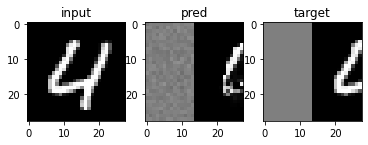

tf.Tensor(0.059906974, shape=(), dtype=float32)
epoch 83


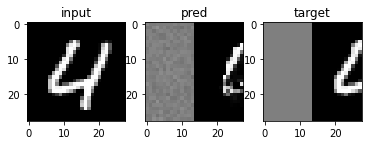

tf.Tensor(0.058285665, shape=(), dtype=float32)
epoch 84


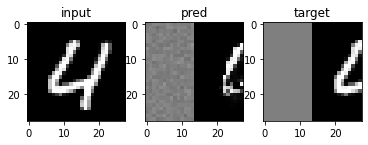

tf.Tensor(0.058594063, shape=(), dtype=float32)
epoch 85


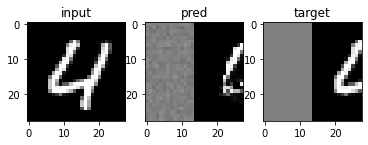

tf.Tensor(0.057881642, shape=(), dtype=float32)
epoch 86


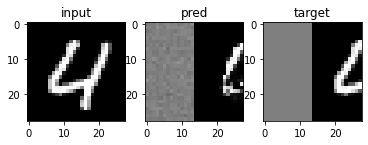

tf.Tensor(0.056691743, shape=(), dtype=float32)
epoch 87


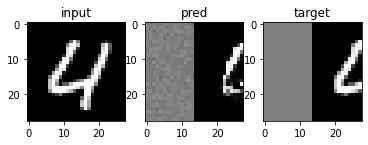

tf.Tensor(0.05658279, shape=(), dtype=float32)
epoch 88


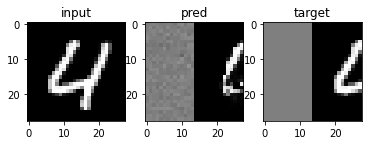

tf.Tensor(0.05644415, shape=(), dtype=float32)
epoch 89


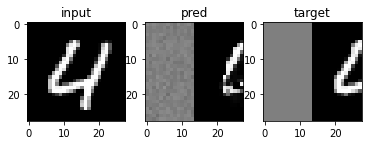

tf.Tensor(0.056270212, shape=(), dtype=float32)
epoch 90


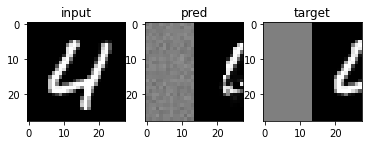

tf.Tensor(0.056320418, shape=(), dtype=float32)
epoch 91


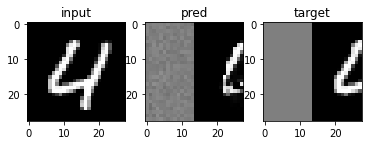

tf.Tensor(0.055255145, shape=(), dtype=float32)
epoch 92


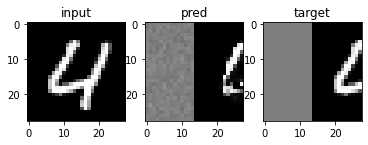

tf.Tensor(0.05482489, shape=(), dtype=float32)
epoch 93


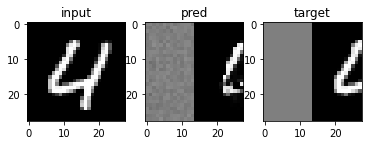

tf.Tensor(0.054140706, shape=(), dtype=float32)
epoch 94


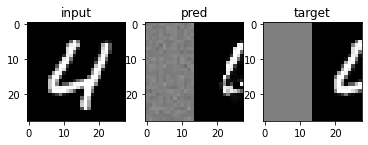

tf.Tensor(0.054808494, shape=(), dtype=float32)
epoch 95


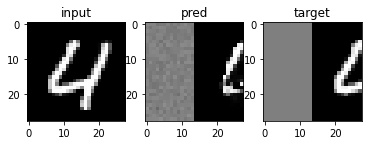

tf.Tensor(0.054966412, shape=(), dtype=float32)
epoch 96


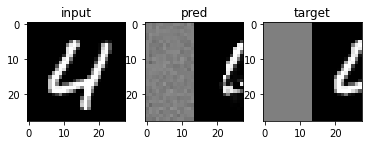

tf.Tensor(0.05493821, shape=(), dtype=float32)
epoch 97


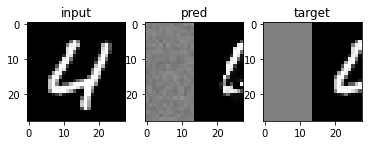

tf.Tensor(0.054377127, shape=(), dtype=float32)
epoch 98


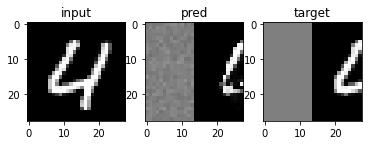

tf.Tensor(0.05586373, shape=(), dtype=float32)


KeyboardInterrupt: ignored

In [279]:
train_step(500)

In [280]:
import tensorflow as tf
def model2():
  inp = tf.keras.layers.Input([28, 28, 1])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 28*28*1]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(28,28), strides=(28,28), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model2()
          


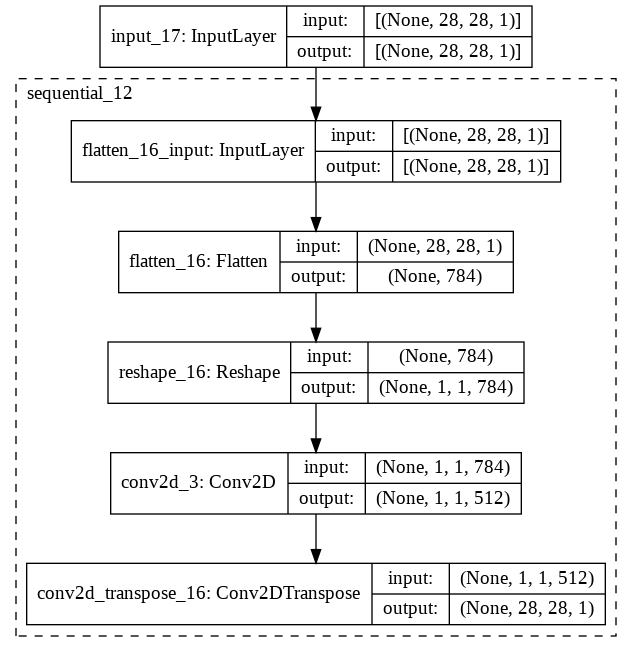

In [282]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


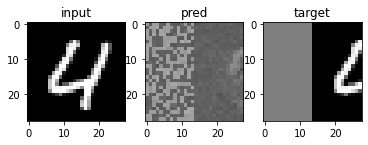

tf.Tensor(0.54896134, shape=(), dtype=float32)
epoch 1


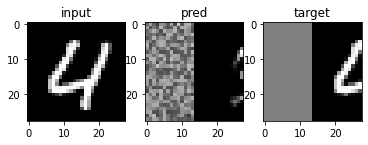

tf.Tensor(0.22450092, shape=(), dtype=float32)
epoch 2


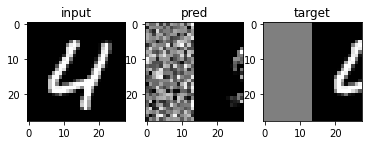

tf.Tensor(0.27858037, shape=(), dtype=float32)
epoch 3


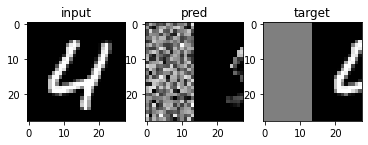

tf.Tensor(0.28653792, shape=(), dtype=float32)
epoch 4


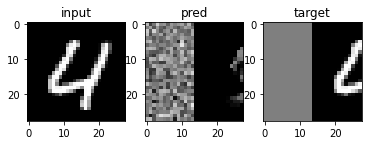

tf.Tensor(0.22343008, shape=(), dtype=float32)
epoch 5


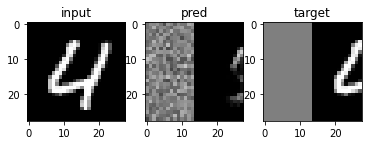

tf.Tensor(0.1787109, shape=(), dtype=float32)
epoch 6


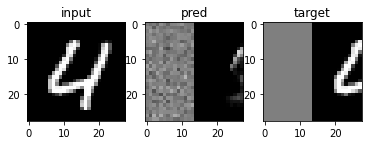

tf.Tensor(0.14759976, shape=(), dtype=float32)
epoch 7


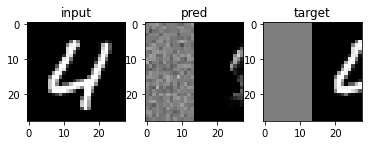

tf.Tensor(0.13942151, shape=(), dtype=float32)
epoch 8


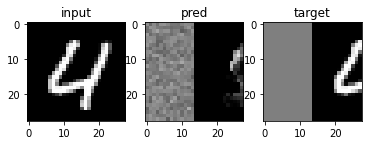

tf.Tensor(0.14090092, shape=(), dtype=float32)
epoch 9


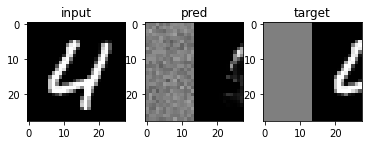

tf.Tensor(0.12437125, shape=(), dtype=float32)
epoch 10


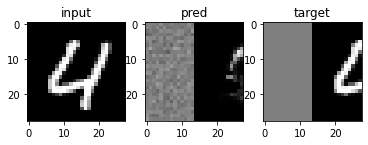

tf.Tensor(0.11851704, shape=(), dtype=float32)
epoch 11


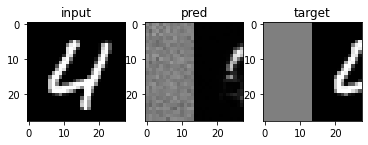

tf.Tensor(0.105621085, shape=(), dtype=float32)
epoch 12


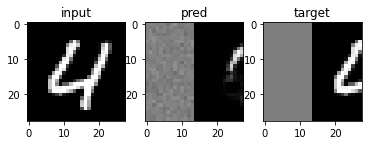

tf.Tensor(0.096278384, shape=(), dtype=float32)
epoch 13


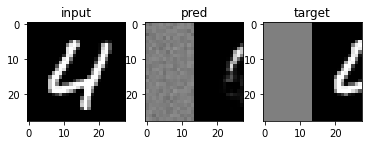

tf.Tensor(0.09084832, shape=(), dtype=float32)
epoch 14


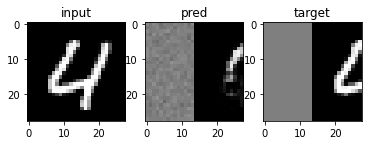

tf.Tensor(0.08905469, shape=(), dtype=float32)
epoch 15


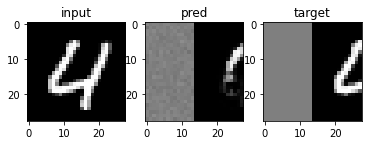

tf.Tensor(0.07600882, shape=(), dtype=float32)
epoch 16


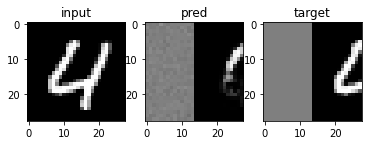

tf.Tensor(0.073682554, shape=(), dtype=float32)
epoch 17


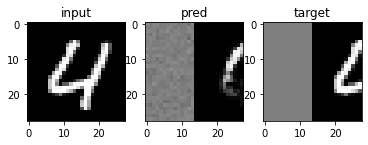

tf.Tensor(0.067379005, shape=(), dtype=float32)
epoch 18


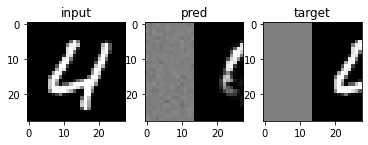

tf.Tensor(0.063716695, shape=(), dtype=float32)
epoch 19


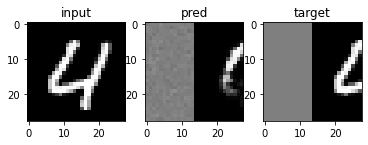

tf.Tensor(0.060274135, shape=(), dtype=float32)
epoch 20


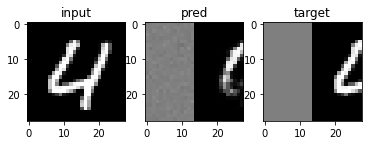

tf.Tensor(0.05649625, shape=(), dtype=float32)
epoch 21


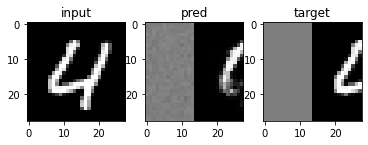

tf.Tensor(0.05600544, shape=(), dtype=float32)
epoch 22


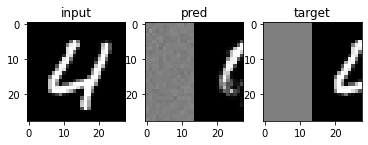

tf.Tensor(0.054012757, shape=(), dtype=float32)
epoch 23


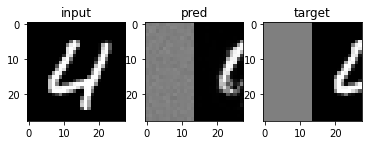

tf.Tensor(0.051115777, shape=(), dtype=float32)
epoch 24


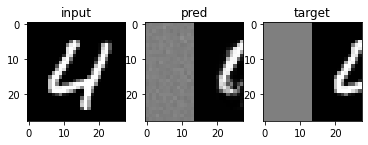

tf.Tensor(0.04888417, shape=(), dtype=float32)
epoch 25


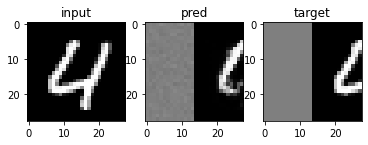

tf.Tensor(0.0463981, shape=(), dtype=float32)
epoch 26


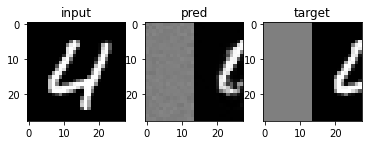

tf.Tensor(0.044628344, shape=(), dtype=float32)
epoch 27


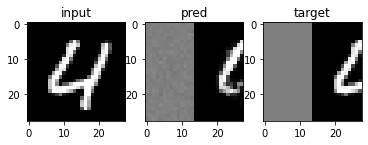

tf.Tensor(0.04235063, shape=(), dtype=float32)
epoch 28


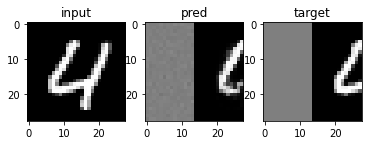

tf.Tensor(0.041097477, shape=(), dtype=float32)
epoch 29


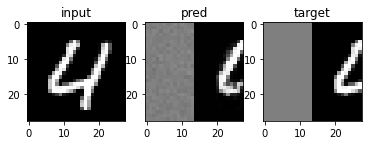

tf.Tensor(0.042390373, shape=(), dtype=float32)
epoch 30


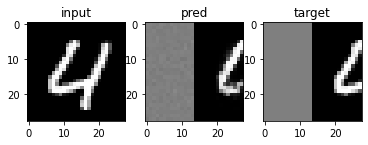

tf.Tensor(0.037477456, shape=(), dtype=float32)
epoch 31


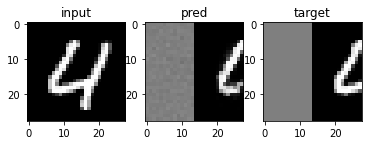

tf.Tensor(0.038047533, shape=(), dtype=float32)
epoch 32


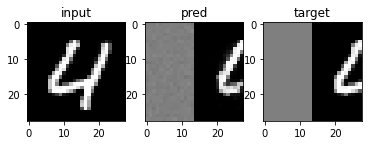

tf.Tensor(0.03557494, shape=(), dtype=float32)
epoch 33


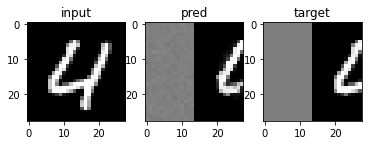

tf.Tensor(0.03356961, shape=(), dtype=float32)
epoch 34


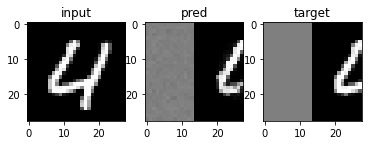

tf.Tensor(0.03412962, shape=(), dtype=float32)
epoch 35


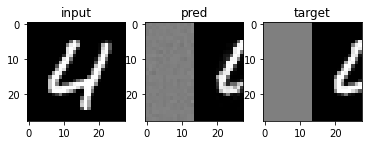

tf.Tensor(0.032020696, shape=(), dtype=float32)
epoch 36


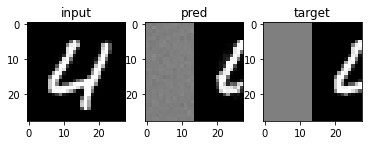

tf.Tensor(0.032390863, shape=(), dtype=float32)
epoch 37


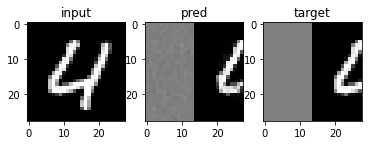

tf.Tensor(0.032413382, shape=(), dtype=float32)
epoch 38


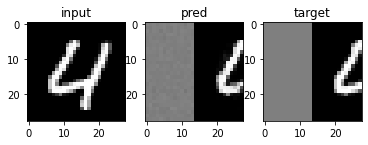

tf.Tensor(0.030566731, shape=(), dtype=float32)
epoch 39


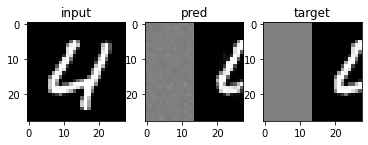

tf.Tensor(0.02970296, shape=(), dtype=float32)


KeyboardInterrupt: ignored

In [283]:
train_step(100)

In [286]:
import tensorflow as tf
def model2():
  inp = tf.keras.layers.Input([512, 512, 3])

  layers = tf.keras.Sequential([tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 512*512*3]),
            #tf.keras.layers.Dense(units=256*256*3, activation="relu"),
            tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding="same", activation=tf.nn.leaky_relu),
            #tf.keras.layers.Conv2D(filters=1024, kernel_size=(4,4), padding="same", activation=tf.nn.leaky_relu),
          tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(512,512), strides=(512,512), padding="same", activation=tf.nn.tanh, use_bias=False),
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = model2()
          


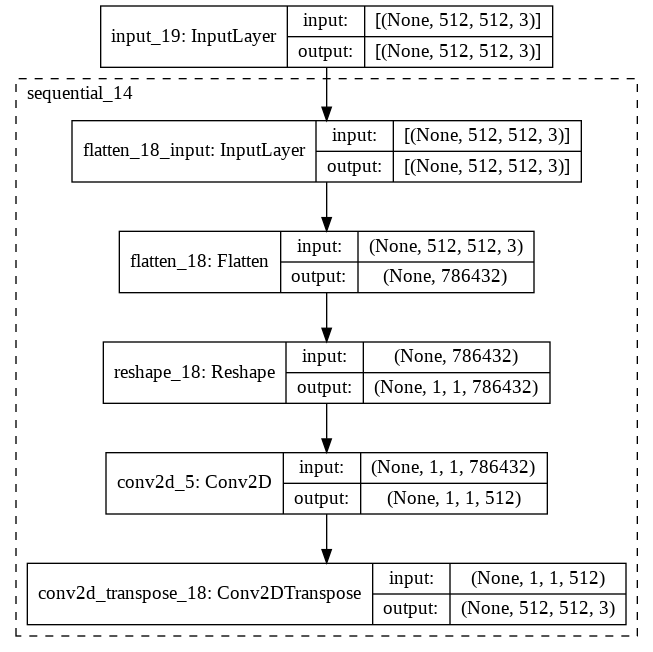

In [287]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)